## Download and prepare the dataset

In [1]:
import tensorflow.python.keras as k

2023-07-18 16:28:47.331101: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-07-18 16:28:47.331738: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-07-18 16:28:47.331753: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-07-18 16:28:47.331759: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


In [2]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Download and prepare the dataset

In [3]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

2023-07-18 16:28:51.226859: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's display the architecture of our convnet so far:

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.1)

2023-07-18 16:28:51.886712: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3264 - accuracy: 0.9064 - val_loss: 0.1697 - val_accuracy: 0.9535
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.1716 - accuracy: 0.9505 - val_loss: 0.1229 - val_accuracy: 0.9662
Epoch 3/10
844/844 [==============================] - 4s 4ms/step - loss: 0.1226 - accuracy: 0.9635 - val_loss: 0.1043 - val_accuracy: 0.9690
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0959 - accuracy: 0.9725 - val_loss: 0.0972 - val_accuracy: 0.9702
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0786 - accuracy: 0.9777 - val_loss: 0.0932 - val_accuracy: 0.9720
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0659 - accuracy: 0.9806 - val_loss: 0.0848 - val_accuracy: 0.9747
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0562 - accuracy: 0.9838 - val_loss: 0.0788 - val_accuracy: 0.9765
Epoch 

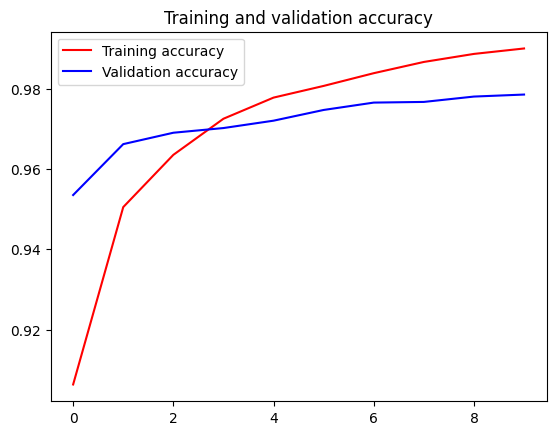

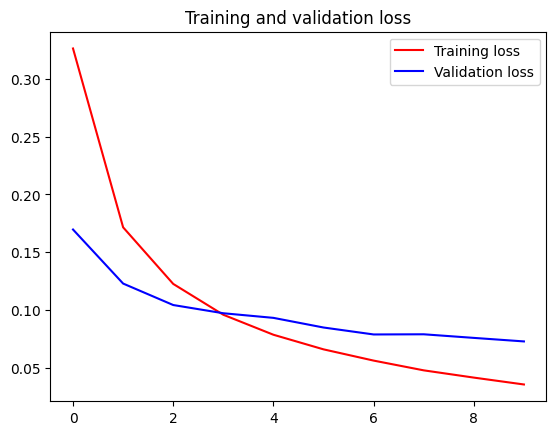

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9762


In [9]:
test_acc

0.9761999845504761

In [10]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]
first_layer_weights

array([[-0.04749022, -0.07198083, -0.04418295, ..., -0.04304342,
        -0.00362299,  0.00690054],
       [-0.06754916, -0.01783376,  0.08100782, ..., -0.06110452,
         0.03872456,  0.00734117],
       [-0.06783087,  0.03486227,  0.01653428, ...,  0.01710482,
        -0.03984206,  0.02189477],
       ...,
       [ 0.07354789, -0.02892095,  0.06314007, ...,  0.06925715,
        -0.05480585,  0.05717308],
       [-0.0784004 ,  0.05149917,  0.02120885, ..., -0.05055894,
         0.06153583,  0.00143612],
       [-0.00693233, -0.07609253,  0.06090648, ..., -0.02570698,
        -0.03597317,  0.004306  ]], dtype=float32)